In [126]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [127]:
# trying to differentiate between human and computer generated random numbers (cant think of practical applications just for fun and to see if i can)
# first thought was to use LDA but the algorithm is too hard for to implement right now and im not sure if itd work 
# will try another method using probability of each position being a certain digit (like naive bayes)

In [128]:
#load raw data 
dat = pd.read_csv("Hello (Responses).csv")
numOfDatasets = len(dat)
dat = dat[["labels", "numbers"]]
dat

,labels,numbers
0,human,764630368926946241527490254892378
1,human,738372947472930184615492017492036
2,human,0294727402847104726349284729405829028
3,human,3738847382829293838393947373929293838383939383...
4,human,9292737378291918273728282827383039737338389393938
...,...,...
367,human,4376816737940083464670466497649499734915729475...
368,human,8282751541452638839506070088654322568938585689...
369,human,3443135578081826252728262728292927272537383390...
370,human,162626373838393525833902762526273839372529394615


In [129]:
# make a list of first 30 digits in each entry
datalist = list(dat["numbers"])
newList = []
for number in datalist:
    newList.append(number[:30])
newList

['764630368926946241527490254892',
 '738372947472930184615492017492',
 '029472740284710472634928472940',
 '373884738282929383839394737392',
 '929273737829191827372828282738',
 '918283929282726373637929193747',
 '958484736262627488493939487484',
 '958474737392038747493937376493',
 '827273840497474636382991826474',
 '262079472936202729739363964372',
 '811882282922929292922929229292',
 '385385385385273158961852843963',
 '040622043773104798307579842819',
 '464546678999973772929919177728',
 '991816161552517819200292761514',
 '627165263738484875838282716617',
 '627162646488364858588472626156',
 '383748283627468273737837472737',
 '281882737381819192727272718181',
 '362627272828282919192828289282',
 '499976184067735524377455993727',
 '316457946583721546897543824619',
 '637372827192928739192828291747',
 '383848495958265936493629473927',
 '838377327266284949605002917165',
 '749165926554294745295629573940',
 '102735153969141956191947152649',
 '193958573727594100191722747484',
 '203848472972650929

In [130]:
# make a new column for each digit in the entries (up to 30th digit) and add it as a column to dataframe 
for i in range(0, 30):
    # label each column for the position number of te digits it contains 
    dat[f"{i}"] = [num[i] for num in newList]
# drop the raw data column 
dat = dat.drop("numbers", axis=1)
dat = dat.sample(frac=1).reset_index(drop=True) # shuffle
# test data probably unnecessary for this method but will do a small one anyways 
testDat = dat[-12:] # take out some from te bottom for testing (will random since data has been shuffled)
dat = dat.drop(dat[-12:].index)
HumanResponsesCount = len(dat) # dont count the responses that have been removed 
dat
# dont covert to int now. can convert when in the numpy arrays (easier to convert the whole thing when we dont have a column that we want to keep as string)

,labels,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,human,2,6,2,0,7,9,4,7,2,...,9,3,6,3,9,6,4,3,7,2
1,human,1,8,2,7,7,4,7,3,7,...,4,8,3,8,3,8,7,3,7,4
2,human,7,3,7,4,6,3,7,3,8,...,1,9,1,9,8,3,7,3,7,4
3,human,6,3,8,1,7,4,6,3,8,...,3,9,2,8,2,6,3,4,7,4
4,human,3,4,8,9,7,7,5,6,5,...,9,8,6,8,5,8,9,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,human,8,2,6,3,6,4,7,2,8,...,8,3,7,7,4,7,4,7,4,7
356,human,6,2,5,3,8,1,7,3,8,...,9,2,8,3,9,3,9,2,8,2
357,human,9,7,0,6,9,7,5,7,5,...,6,4,0,2,9,3,9,3,8,5
358,human,2,6,7,2,5,6,4,8,3,...,4,8,3,8,3,6,3,7,3,8


In [131]:
# add rows of computer generated data equal to the number of human data collected
CompResponsesCount = HumanResponsesCount # equal number
for i in range(0, CompResponsesCount):
    tempList = []
    tempList.append("computer")
    for x in range(0, 30):
        tempList.append(str(random.randint(0, 9)))
    dat.loc[len(dat.index)] = tempList

dat

,labels,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,human,2,6,2,0,7,9,4,7,2,...,9,3,6,3,9,6,4,3,7,2
1,human,1,8,2,7,7,4,7,3,7,...,4,8,3,8,3,8,7,3,7,4
2,human,7,3,7,4,6,3,7,3,8,...,1,9,1,9,8,3,7,3,7,4
3,human,6,3,8,1,7,4,6,3,8,...,3,9,2,8,2,6,3,4,7,4
4,human,3,4,8,9,7,7,5,6,5,...,9,8,6,8,5,8,9,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,computer,0,7,9,7,4,0,2,7,6,...,4,2,8,1,0,9,3,8,6,7
716,computer,4,5,3,3,6,4,6,6,6,...,6,4,2,6,7,3,0,5,4,2
717,computer,7,7,0,1,2,8,1,5,9,...,5,1,1,6,1,3,1,7,8,0
718,computer,5,2,6,4,9,7,0,4,6,...,2,5,0,1,0,4,6,7,9,7


In [132]:
# add rows of computer generated data equal to the number of human data used for testing
for i in range(0, len(testDat.index)):
    tempList = []
    tempList.append("computer")
    for x in range(0, 30):
        tempList.append(str(random.randint(0, 9)))
    testDat.loc[len(testDat.index)] = tempList

testDat = testDat.reset_index(drop=True)
testDat

,labels,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,human,6,9,1,6,3,9,5,0,5,...,1,0,1,7,5,5,8,9,3,8
1,human,8,5,2,7,5,5,2,5,2,...,5,8,3,5,2,3,1,1,4,7
2,human,2,9,5,7,2,5,5,1,5,...,0,4,2,7,7,3,9,2,9,2
3,human,2,7,3,8,4,9,7,8,9,...,2,7,2,7,1,8,3,9,2,0
4,human,6,3,6,2,1,8,6,3,5,...,1,7,3,9,3,3,7,3,8,8
5,human,6,4,7,3,8,1,9,1,7,...,8,2,7,1,5,6,3,7,4,9
6,human,3,9,3,7,6,1,7,2,9,...,9,6,0,1,6,2,8,5,0,6
7,human,8,2,7,2,6,6,4,8,4,...,4,0,4,8,3,7,2,6,2,6
8,human,9,0,8,5,6,4,9,0,4,...,6,5,2,0,3,4,9,5,6,7
9,human,9,2,7,3,8,3,6,2,6,...,4,7,6,2,5,1,5,5,1,7


In [133]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)
TrainingData

array([[2, 6, 2, ..., 3, 7, 2],
       [1, 8, 2, ..., 3, 7, 4],
       [7, 3, 7, ..., 3, 7, 4],
       ...,
       [7, 7, 0, ..., 7, 8, 0],
       [5, 2, 6, ..., 7, 9, 7],
       [1, 2, 2, ..., 2, 0, 4]])

In [134]:
# used to test later 
def CheckAns(x):
    print("correct ans:", dat.iloc[x, 0])
    return dat.iloc[x, 0]
CheckAns(random.randint(0,numOfDatasets))

correct ans: human


'human'

In [135]:
# count the probability of each digit appearing in each category 
humanData = TrainingData[:HumanResponsesCount]
compData = TrainingData[HumanResponsesCount:]   
def dataToCountDict(data):
    # np.unique returns two lists of each unique occurence and second list of corresponding counnts 
    digits, Counts = np.unique(data, return_counts=True) 
    Dictionary = dict(zip(digits, Counts))
    return Dictionary

humanDict = dataToCountDict(humanData)
compDict = dataToCountDict(compData)

totalCountH = len(humanData)*30 # will be the same for human and comp 
totalCountC = len(compData)*30 # but use both just in case we want to use this for a dataset with unequal number

def CountToProbDict(dictionary, totalCount):
    for i in range(0, len(dictionary)):
        dictionary[i] = dictionary[i] / totalCount
    return dictionary
humanProbs = CountToProbDict(humanDict, totalCountH)
compProbs = CountToProbDict(compDict, totalCountC)
humanProbs

{0: 0.04287037037037037,
 1: 0.06972222222222223,
 2: 0.1312037037037037,
 3: 0.12481481481481481,
 4: 0.09824074074074074,
 5: 0.07444444444444444,
 6: 0.09805555555555556,
 7: 0.12185185185185185,
 8: 0.12342592592592593,
 9: 0.11537037037037037}

Text(0, 0.5, 'probability')

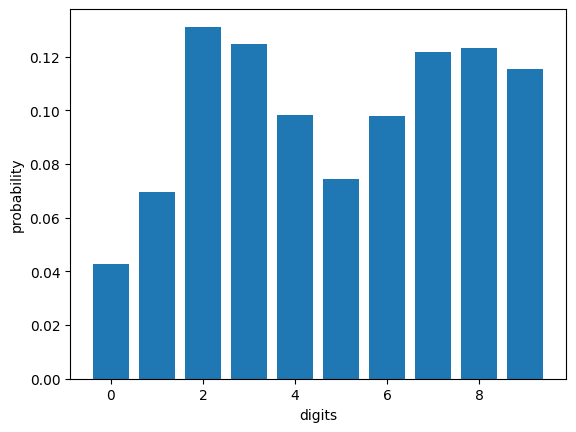

In [136]:
# visualise (not rlly necessary for this dataset i guess but wnat to try)
plt.bar(humanProbs.keys(), humanProbs.values())
plt.xlabel("digits")
plt.ylabel("probability")
# relative frequency of  each digit appearing in human spam

Text(0, 0.5, 'probability')

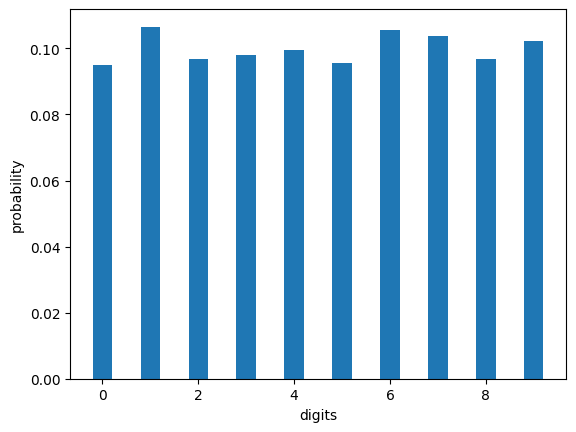

In [137]:
plt.bar(compProbs.keys(), compProbs.values(), width=0.4) # trying thinner bars
plt.xlabel("digits")
plt.ylabel("probability")
# obvious difference in distribution can prb be used to differentiate

In [161]:
# first thing to try is naive bayes 

# prior P(is Human) based on data given (will simply be 0.5 in this case but good to calculate in case we want to use this again for different dataset)
priorProbabilityHuman = dat["labels"].value_counts(normalize=True).iloc[0] # gives relative frequencey of each unique occurence (we only want human so take the first index only)
priorProbabilityComp = dat["labels"].value_counts(normalize=True).iloc[1]

def NaiveBayes(NParray): # will return "human" or "computer" with probabilty 
# prior P(is human) * P(0 occuring given human)**(number of times 0 apppears) * P(1 occuring given human)**(number of times 1 appears)...etc will be proportionate to P(is human given all these digits are occuring)
    human = priorProbabilityComp
    for i in NParray:
        human = human * humanProbs[NParray[i]] # looks for the digit at i and multiplies by the probability of that didgit appearing given is human
# do the same for comp 
    computer = priorProbabilityComp
    for i in NParray:
        computer = computer * compProbs[NParray[i]]
    # since there are only two possible values (human or computer) and they probabilities must add to 1 the proportionality constant must be 1/(human + computer)
    if computer >= human:
        return ["computer", computer/(computer + human)]
    else:
        return ["human", human/(computer + human)]

In [187]:
# test with data in the training data 
correct = 0
for i, array in enumerate(TrainingData):

    prediction = NaiveBayes(array)[0]
    if prediction == dat["labels"].iloc[i]:
        correct += 1

accuracy = correct/len(dat.index)
print(accuracy)

0.675


In [183]:
# test with data not in the training data 
testData = pd.DataFrame(testDat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

correct = 0
for i, array in enumerate(testData):

    prediction = NaiveBayes(array)[0]
    if prediction == testDat["labels"].iloc[i]:
        correct += 1

accuracy = correct/len(testDat.index)
print(accuracy) # not very good but thats because we arent considering the order in which the digits appear (example given below)

0.75


In [196]:
TrainingData[0]

array([2, 6, 2, 0, 7, 9, 4, 7, 2, 9, 3, 6, 2, 0, 2, 7, 2, 9, 7, 3, 9, 3,
       6, 3, 9, 6, 4, 3, 7, 2])

In [200]:
# example of why naive bayes doesnt work that well 
NaiveBayes(np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])) # almost impossible for computer (P = 10**-30) to generate this but since few "1" occur in human dataset it thinks this is definitely computer
# need to have consideration for the order of occurence as well since there are certain patterns humans follow 
# gaussian bayes will be implemented soon :)

['computer', 0.9999970379779259]